# Chap04 - Gaussian Mixture Model(GMM)

## 0. imports

In [1]:
%load_ext jupyter_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 4.3

### gmm.py

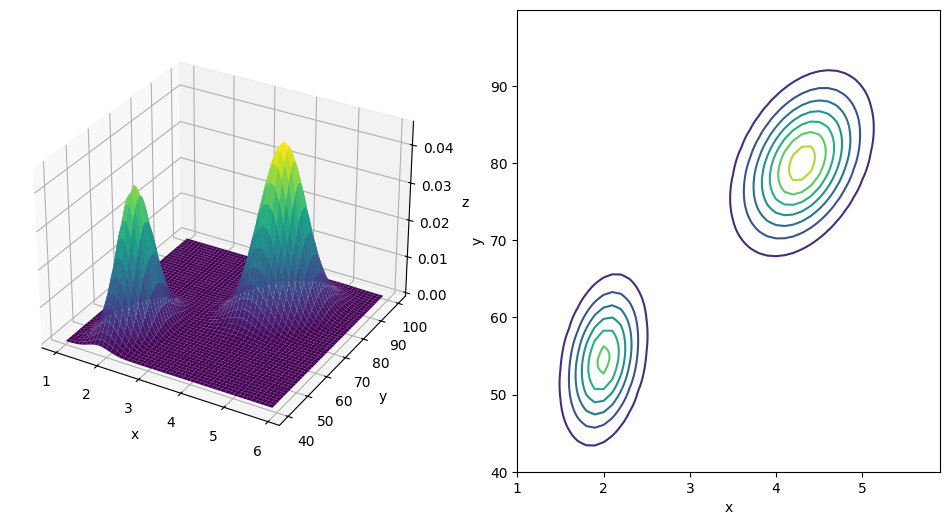

In [3]:
mus = np.array([[2.0, 54.50], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]], [[0.17, 0.94], [0.94, 36.00]]])
phis = np.array([0.35, 0.65])


def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y


def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y


# plot
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.plot_surface(X, Y, Z, cmap="viridis")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.contour(X, Y, Z)
plt.show()

In [4]:
covs.shape

(2, 2, 2)